In [1]:
import torch
torch.__version__

'2.5.0+cu121'

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6DUZXUzEElvb164kQwwY")
project = rf.workspace("pingworkspace").project("txlpbc-v2-vnadh")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to txlpbc-v2-1 in yolov8:: 100%|██████████| 822/822 [00:00<00:00, 7089.45it/s]


In [4]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=/content/txlpbc-v2-1/data.yaml epochs=200 imgsz=224

100% 52.4M/52.4M [00:00<00:00, 316MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/txlpbc-v2-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [5]:
import glob
from IPython.display import Image, display

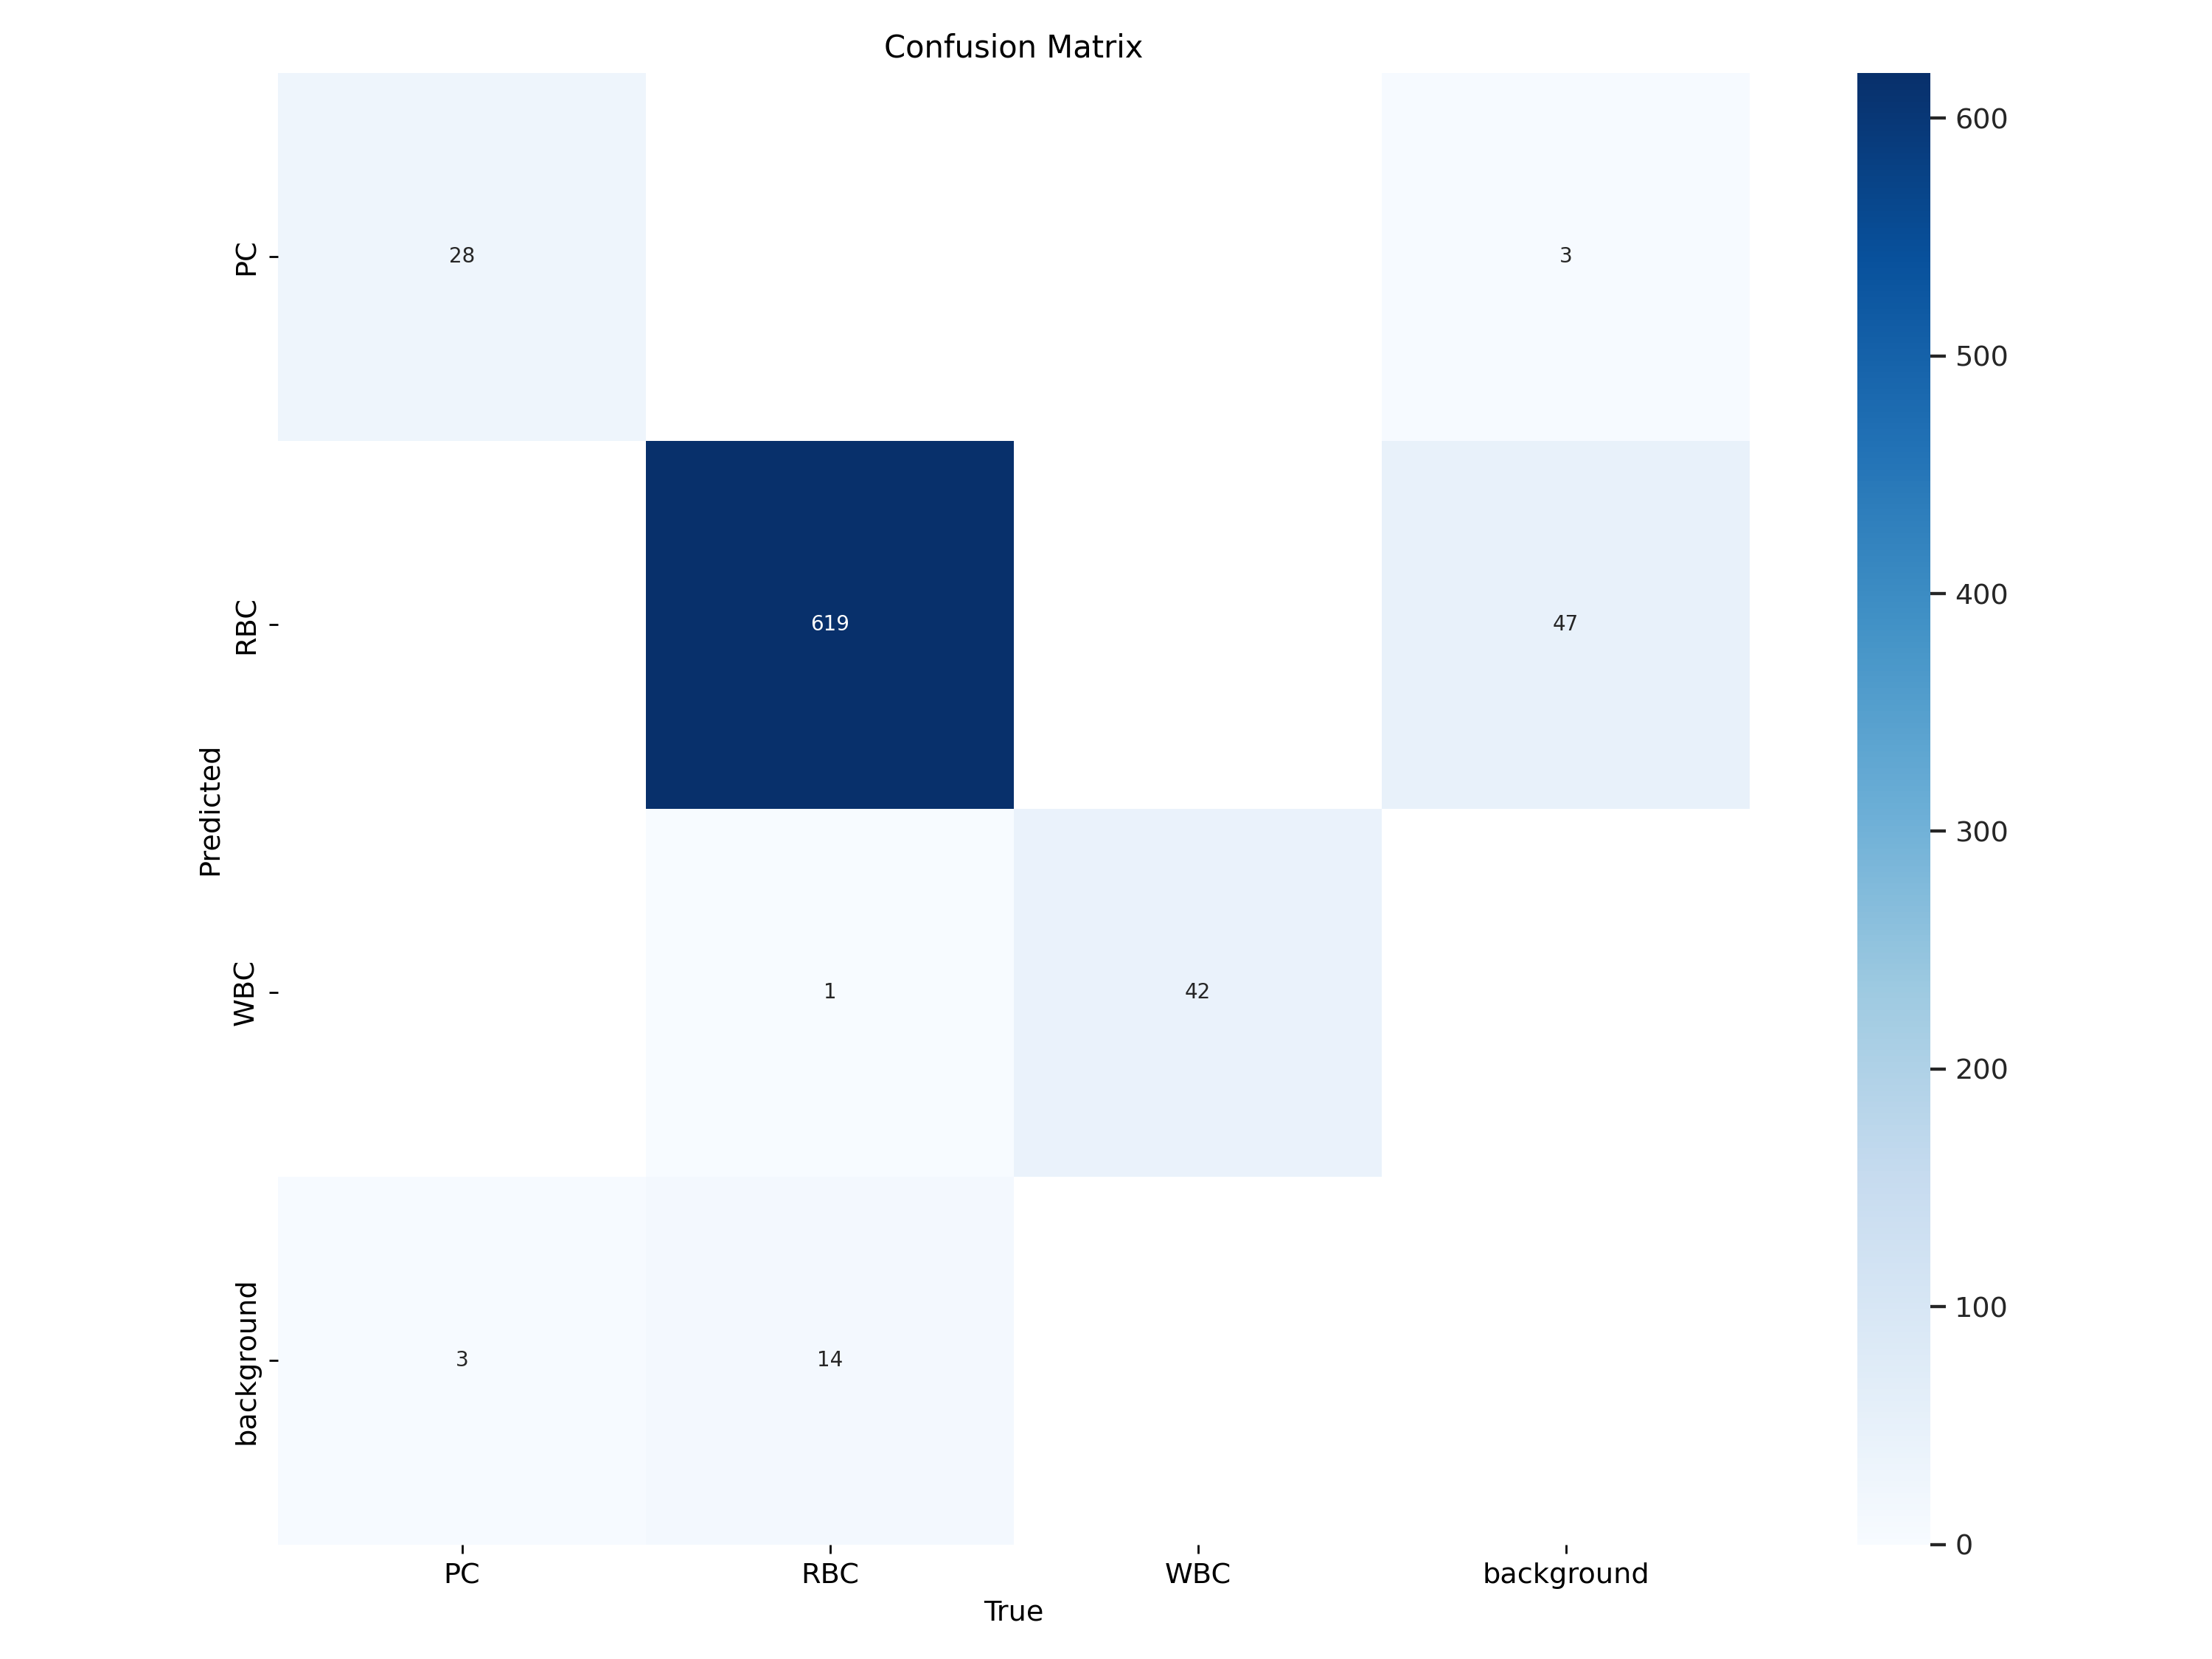

In [6]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

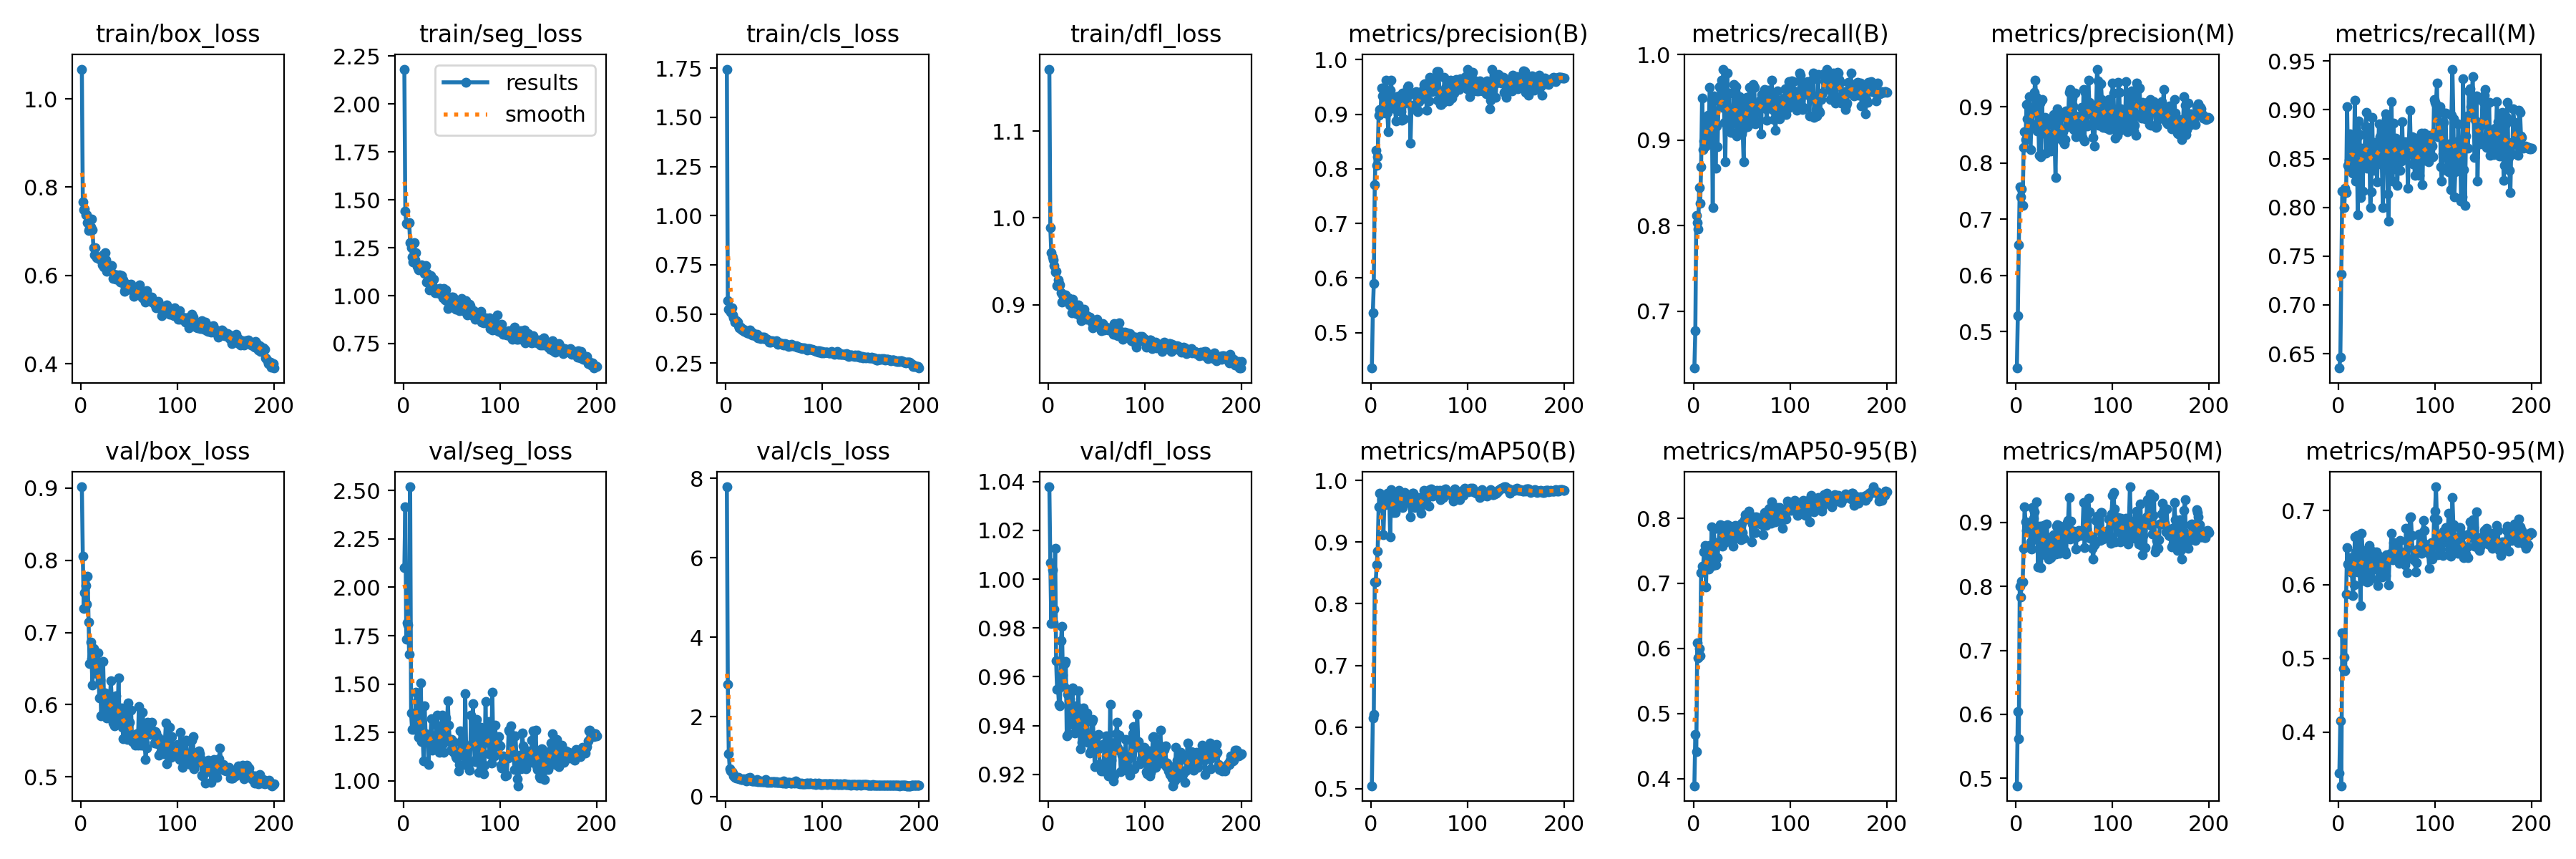

In [7]:
Image(filename=f'/content/runs/segment/train/results.png', width=600)

In [8]:
!yolo task=segment mode=val plots=True model=/content/runs/segment/train/weights/best.pt data=/content/txlpbc-v2-1/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,121 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/txlpbc-v2-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.15s/it]
                   all         40        707      0.964      0.943      0.982      0.816      0.924      0.906      0.941      0.719
                    PC         17         31      0.962      0.871      0.965      0.614      0.855      0.774      0.855      0.457
                   RBC         40        634      0.955      0.957      0.985      0.893       0.94      0.943      0.972      0.769
                   WBC         40         42      0.976          1      0.995       0.94      0.976          1      0.995       0.93
Speed:

In [14]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.5 source=/content/txlpbc-v2-1/test/images show_labels=False show_conf=False show_boxes=False save_txt=True


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,121 parameters, 0 gradients, 110.0 GFLOPs

image 1/40 /content/txlpbc-v2-1/test/images/01e4af27-0d62-557e-b967-cd665b590d45_jpg.rf.1bb993b80864a28505a6561858cf92d4.jpg: 224x224 26 RBCs, 1 WBC, 17.3ms
image 2/40 /content/txlpbc-v2-1/test/images/02db46d5-f0f3-511c-b2cc-e907946e88e2_jpg.rf.7ec350014481c02d9a945dea9ff3bf82.jpg: 224x224 26 RBCs, 1 WBC, 14.7ms
image 3/40 /content/txlpbc-v2-1/test/images/04b0c5c4-6135-51fa-a213-57c40224a22f_jpg.rf.d11e71fb6ae2a03652bc125b667402f8.jpg: 224x224 18 RBCs, 1 WBC, 14.6ms
image 4/40 /content/txlpbc-v2-1/test/images/09436e64-f0d3-5bf4-8b7a-a1402cef406e_jpg.rf.57303bb2bd6943cfa053aa828254b70a.jpg: 224x224 6 RBCs, 1 WBC, 14.6ms
image 5/40 /content/txlpbc-v2-1/test/images/0bc2ead0-d362-5d7c-808d-c6500cfe3ed4_jpg.rf.695d3a96d4cb432eb93f420b910a71ec.jpg: 224x224 1 PC, 25 RBCs, 1 WBC, 14.5ms
image 6/40 /content/txlpbc-v2-1/test/

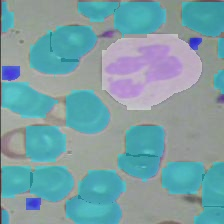

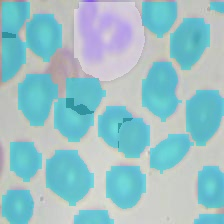

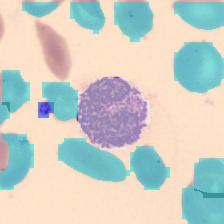

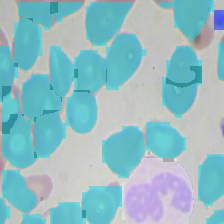

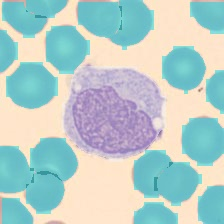

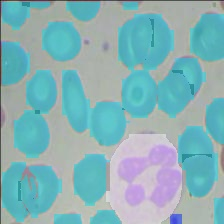

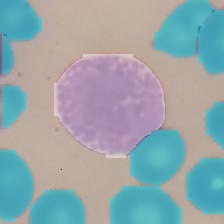

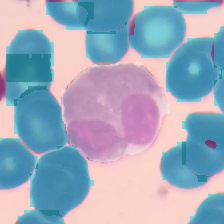

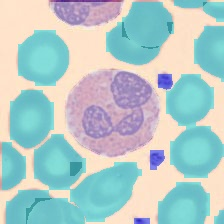

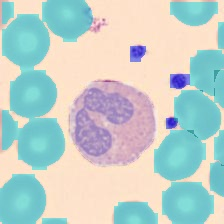

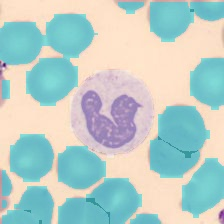

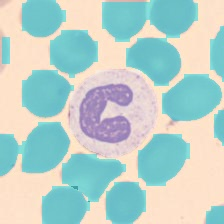

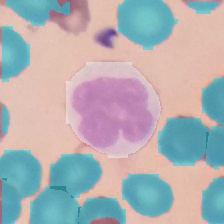

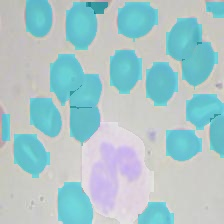

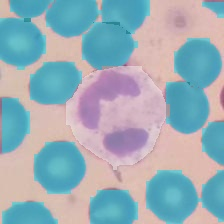

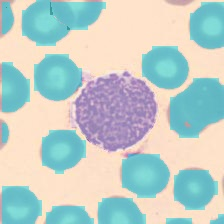

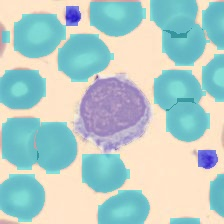

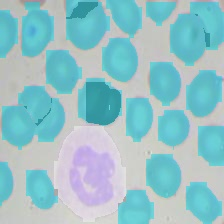

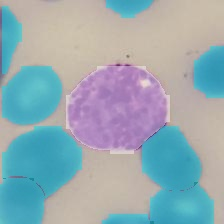

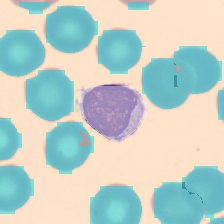

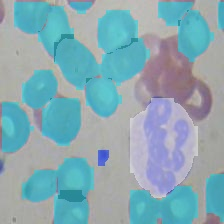

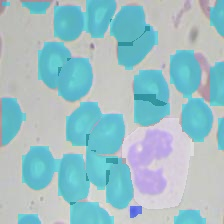

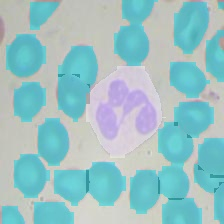

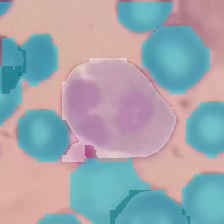

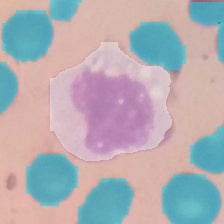

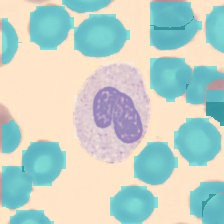

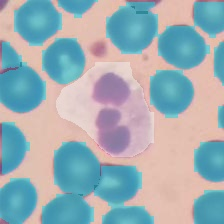

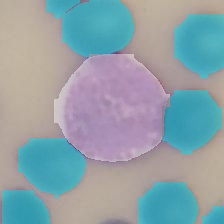

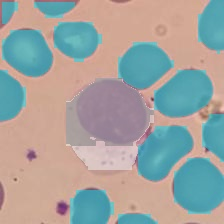

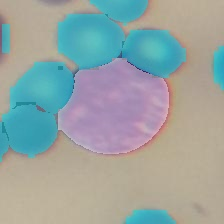

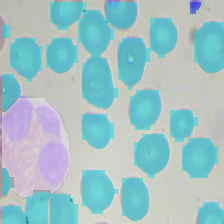

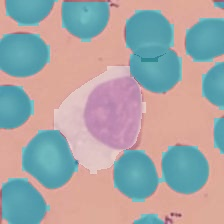

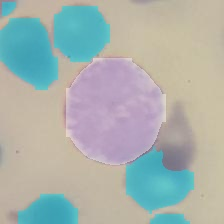

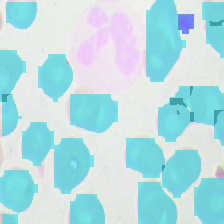

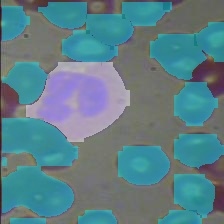

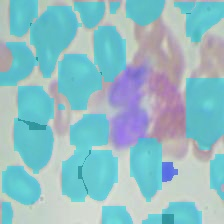

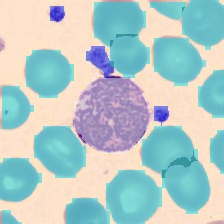

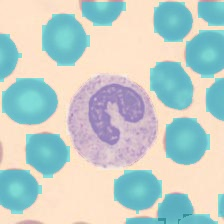

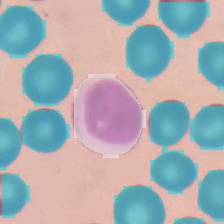

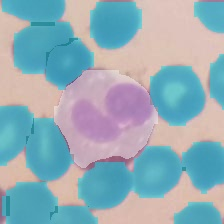

In [1]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

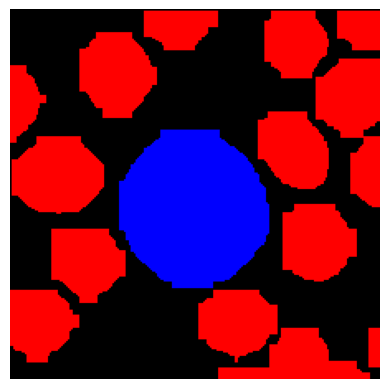

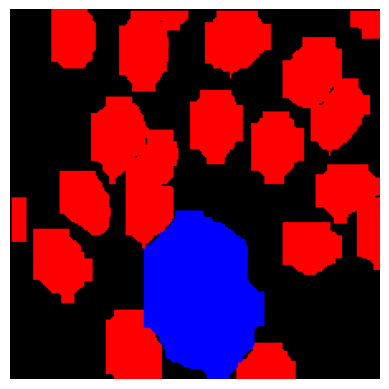

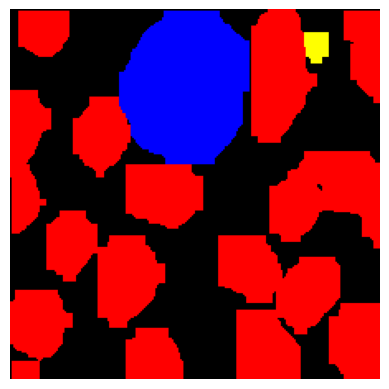

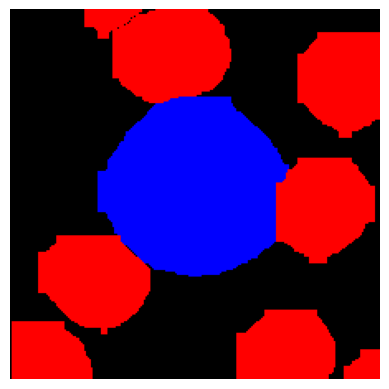

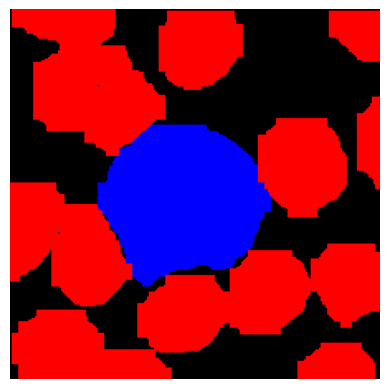

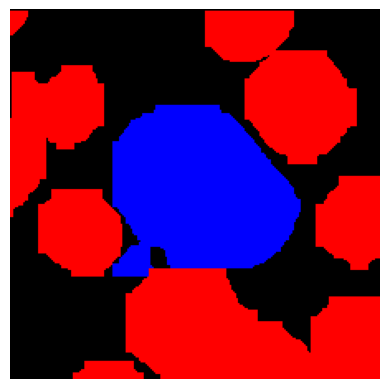

In [ ]:
import cv2
import glob
import numpy as np
import os
from matplotlib import pyplot as plt

# Define colors for each class (in BGR format for OpenCV)
class_colors = {
    0: (0, 255, 255),     # Red for class 0
    1: (0, 0, 255),     # Blue for class 1
    2: (255, 0, 0),   # Yellow for class 2
    3: (0, 0, 0)        # Black for background (class 3)
}

# Directory paths
label_dir = '/content/runs/segment/predict/labels'
output_dir = '/content/labeled_image'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to create a labeled mask from the label file
def create_label_image(label_path):
    # Create a blank black image (224x224)
    label_image = np.zeros((224, 224, 3), dtype=np.uint8)

    # Read each line in the label file
    with open(label_path, 'r') as file:
        for line in file:
            class_id, *polygon = map(float, line.strip().split())
            class_id = int(class_id)

            # Get the corresponding color for this class
            color = class_colors.get(class_id, (0, 0, 0))  # Default to black if class is undefined

            # Convert polygon points to integer coordinates
            polygon = np.array(polygon).reshape(-1, 2)
            polygon[:, 0] *= 224  # Scale x-coordinates to 224x224 image size
            polygon[:, 1] *= 224  # Scale y-coordinates to 224x224 image size
            polygon = polygon.astype(int)

            # Draw the polygon on the label image with the class color
            cv2.fillPoly(label_image, [polygon], color)

    return label_image

# Process each label file
for label_path in glob.glob(f'{label_dir}/*.txt'):
    label_name = os.path.basename(label_path).replace('.txt', '.jpg')

    # Create the label image based on the label file
    label_image = create_label_image(label_path)

    # Display the result
    plt.imshow(cv2.cvtColor(label_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save the labeled image
    output_path = os.path.join(output_dir, label_name)
    cv2.imwrite(output_path, label_image)
